# Análise Cohort: Retenção dos Clientes

O vídeo no youtube explicando a construção desse notebook encontra-se disponível [nesse link.](https://www.youtube.com/watch?v=EPrLgJhmuEM)

## Teoria sobre análise Cohort

Um <b>Cohort</b> (ou coorte em português) pode ser definido como um <b>conjunto de pessoas que apresentam um comportamento em comum dentro de um determinado período de tempo.</b> Esse conceito estatístico pode ser aplicado em diversas áreas como geografia, psicologia, medicina e economia. Dentro do contexto de marketing e produtos digitais, a análise de Cohort <b>pode ser utilizada para observar a retenção dos clientes de um ecommerce</b> ao longo do tempo ou o comportamento dos usuários em um aplicativo.

### Exemplo de uma matriz utilizada para análise Cohort:

<img src="cohort_table.png" width=650px style="float:left"/>

Na matriz acima a primeira coluna diz respeito aos Cohorts que iremos analisar. Na segunda coluna temos a quantidade de usuários daquele cohort, em "Day 0" todos os cohorts irão ser 100% e nas colunas seguintes podemos observar qual foi a retenção dos usuários de cada cohort ao longo do tempo.<br>

<b>Exemplo:</b> Dos usuários que fizeram uma compra no dia 25 de janeiro, quantos compraram 1 dia depois? E 2 dias depois? e 7 dias depois? Com essa matriz cohort conseguimos analisar o comportamento dos usuários e responder essas perguntas.

## Problema de Negócio

Você trabalha na RandomGifts, um <i>ecommerce</i> localizado no Reino Unido que vende presentes para todas as ocasiões. A empresa investe em diversos esforços de media online e offline para alavancar suas vendas. <br>

O time de marketing deseja entender a qualidade e efetividade de seus esforços realizados no ano de 2011 para replicar os acertos/minimizar os erros em 2012. Para isso, será necessário <b>analisar as safras de clientes no ano de 2011 e seu comportamento ao longo do tempo.</b>

## Sobre o Dataset

Para confecção desse projeto foi utilizado o <b>Dataset "Online Retail" da UCI Machine Learning Repository</b>, que pode ser encontrado [nesse link.](https://archive.ics.uci.edu/ml/datasets/online+retail)<br>
Esse dataset contém todas as transações que ocorreram entre 01/12/2010 e 09/12/2011 em um <i>ecommerce</i> do Reino Unido. A empresa tem como foco a venda de presentes para todas as ocasiões.

### Colunas:
* <b>InvoiceNo:</b> Código do pedido
* <b>StockCode:</b> Código do produto
* <b>Description:</b> Nome do produto
* <b>Quantity:</b> Quantidade
* <b>InvoiceDate:</b> Data do pedido
* <b>UnitPrice:</b> Preço do produto
* <b>CustomerID:</b> Código do cliente
* <b>Country:</b> País em que o cliente reside


## Projeto:

### Bibliotecas utilizadas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

print('Bibliotecas carregadas!!')

Bibliotecas carregadas!!


### Carregamento dos dados

In [6]:
ds_path = 'D:\Projetos\Cohort_Analysis\Online_Retail.xlsx'
data = pd.read_excel(ds_path)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
print("Resumo do Dataset: \n")
data.info()

Resumo do Dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
print("Descrição estatística: \n")
data.describe()

Descrição estatística: 



,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
print("Tamanho do dataset: {}" .format(data.shape))

Tamanho do dataset: (541909, 8)


### Limpeza dos Dados

#### Valores Nulos
Quando observamos o "Resumo do Dataset" podemos observar uma discrepância de quantidade de dados não nulos em cada uma das colunas. Precisamos identificar esses dados nulos e removê-los de nossa análise.

In [13]:
#Criando uma função para retornar a quantidade de valores nulos em cada coluna
def sum_null (x):
    return x.isna().sum()

sum_null(data)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [15]:
#Remoção dos valores nulos
cleaned_data = data.dropna(subset = ['CustomerID'])
sum_null(cleaned_data)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Valores Negativos
Quando analisamos a "Descrição estatística" dos dados, podemos observar que o valor mínimo para as colunas "Quantity" e "UnitPrice" são negativos. Provavelmente ocorreu um erro na coleta dos dados e precisamos removê-los de nossa análise, pois não faz sentido quantidades e preços negativos.

In [16]:
#Removendo quantidades e preços negativos
cleaned_data=cleaned_data[(cleaned_data['Quantity']>0) & (cleaned_data['UnitPrice']>0)]
cleaned_data.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


### Preparação dos dados

Para confecção de uma Matriz Cohort similar a apresentada na seção "Teoria sobre análise cohort" precisamos manipular nosso dataset para encontrar algumas informações. São elas:<br>
* <b> Invoice Period:</b> data em que foi realizada a transação pelo cliente.
* <b> CohortGroup:</b> data da primeira compra desse cliente.
* <b> CohortIndex:</b> números de meses que passou desde a primeira compra desse cliente.

In [17]:
#Função que retorna mês e ano 
def month(x):
    return dt.datetime(x.year, x.month,1)

In [19]:
#Criando a coluna InvoicePeriod
cleaned_data['InvoicePeriod'] = cleaned_data['InvoiceDate'].apply(month)

#Criando a coluna CohortPeriod
grouping = cleaned_data.groupby('CustomerID')['InvoicePeriod']
cleaned_data['CohortPeriod'] = grouping.transform('min')
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicePeriod,CohortPeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [20]:
#Função que retorna data separado em dia, mês e ano
def get_date(data, feature):
    year = data[feature].dt.year
    month = data[feature].dt.month
    day = data[feature].dt.day
    
    return year, month, day

In [27]:
#Cria variáveis para InvoicePeriod e CohortPeriod
invoice_year, invoice_month, _ = get_date(cleaned_data, 'InvoicePeriod')
cohort_year, cohort_month, _ = get_date(cleaned_data, 'CohortPeriod')

#Calcula a diferença entre a data atual e data da primeira compra
year_sub = invoice_year - cohort_year
month_sub = invoice_month - cohort_month

#Criação da coluna CohortIndex
cleaned_data['CohortIndex'] = year_sub * 12 + month_sub + 1
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicePeriod,CohortPeriod,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


### Criação do Cohort

In [33]:
#Criando a tabela dinâmica do Cohort
cohort_data = cleaned_data.groupby(['CohortPeriod', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_count = cohort_data.pivot_table(index = 'CohortPeriod', columns = 'CohortIndex',values = 'CustomerID')

#Aplicando porcentagem nos cohorts
cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis=0)
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortPeriod,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


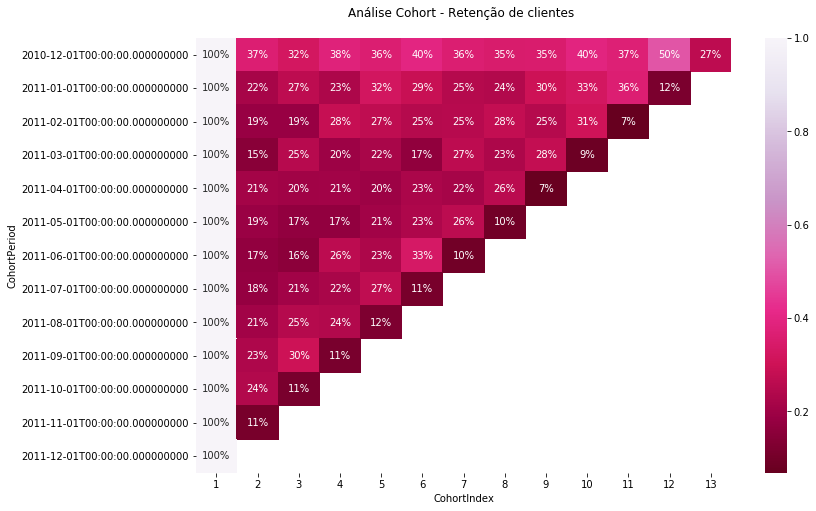

In [35]:
#Criação da matriz cohort utilizando Seaborn
plt.figure(figsize = (12,8))
plt.title('Análise Cohort - Retenção de clientes \n')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            cmap = "PuRd_r")
plt.show()

### Conclusão:

Observando essa matriz conseguimos observar o grau de retenção de clientes que compraram em cada mês de 2011.<br>

<b>Pontos de atenção para equipe de marketing:</b>
* O cohort de dez/2010 apresentou uma forte retenção no mês de nov/2011. Isso pode indicar que esses clientes utilizam o ecommerce para comprar principalmente em épocas como Natal e Black Friday.
* O cohort de fev/2011 apresentou uma baixa retenção nos meses posteriores a primeira compra, mas essa retenção subiu durante um período. Por que isso aconteceu?
* Na maioria dos cohorts, a retenção no mês de dezembro é muito baixa. O que pode ser feito para melhorar isso, visto que dezembro deveria ser um mês interessante para venda de presentes?